In [41]:
import pandas as pd

# Load the CSV file
file_path = '/content/Lok_sabha.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Party    40 non-null     object
 1   Won      40 non-null     int64 
 2   Leading  40 non-null     int64 
 3   Total    40 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ KB


(                                 Party  Won  Leading  Total
 0         Bharatiya Janata Party - BJP  240        0    240
 1       Indian National Congress - INC   99        0     99
 2                 Samajwadi Party - SP   37        0     37
 3  All India Trinamool Congress - AITC   29        0     29
 4      Dravida Munnetra Kazhagam - DMK   22        0     22,
 None)

In [45]:
#Basic summarizing
total_parties = df['Party'].nunique()

total_seats_won = df['Won'].sum()
average_seats_won = df['Won'].mean()

In [46]:
top_party = df[df['Won'] == df['Won'].max()]['Party'].values[0]
top_party_seats = df['Won'].max()

bottom_party = df[df['Won'] == df['Won'].min()]['Party'].values[0]
bottom_party_seats = df['Won'].min()

total_seats_leading = df['Leading'].sum()

top_leading_party = df[df['Leading'] == df['Leading'].max()]['Party'].values[0]
top_leading_party_seats = df['Leading'].max()

In [49]:

bottom_leading_party = df[df['Leading'] == df['Leading'].min()]['Party'].values[0]
bottom_leading_party_seats = df['Leading'].min()


top_5_parties_total_seats = df.nlargest(5, 'Total')[['Party', 'Total']]

proportion_top_party = top_party_seats / total_seats_won



formatted_insights = {
    'Total number of parties': total_parties,
    'Total seats won by all parties': total_seats_won,
    'Average seats won by a party': average_seats_won,
    'Party with the highest number of seats won': {
        'Party': top_party,
        'Seats won': top_party_seats
    },
    'Party with the lowest number of seats won': {
        'Party': bottom_party,
        'Seats won': bottom_party_seats
    },
    'Total seats leading by all parties': total_seats_leading,
    'Party with the highest number of seats leading': {
        'Party': top_leading_party,
        'Seats leading': top_leading_party_seats
    },
    'Party with the lowest number of seats leading': {
        'Party': bottom_leading_party,
        'Seats leading': bottom_leading_party_seats
    },
    'Top 5 parties by total seats': top_5_parties_total_seats.to_dict('records'),
    'Proportion of seats won by the top party': proportion_top_party
}

formatted_insights



{'Total number of parties': 40,
 'Total seats won by all parties': 535,
 'Average seats won by a party': 13.375,
 'Party with the highest number of seats won': {'Party': 'Bharatiya Janata Party - BJP',
  'Seats won': 240},
 'Party with the lowest number of seats won': {'Party': 'United People’s Party Liberal - UPPL',
  'Seats won': 1},
 'Total seats leading by all parties': 0,
 'Party with the highest number of seats leading': {'Party': 'Bharatiya Janata Party - BJP',
  'Seats leading': 0},
 'Party with the lowest number of seats leading': {'Party': 'Bharatiya Janata Party - BJP',
  'Seats leading': 0},
 'Top 5 parties by total seats': [{'Party': 'Bharatiya Janata Party - BJP',
   'Total': 240},
  {'Party': 'Indian National Congress - INC', 'Total': 99},
  {'Party': 'Samajwadi Party - SP', 'Total': 37},
  {'Party': 'All India Trinamool Congress - AITC', 'Total': 29},
  {'Party': 'Dravida Munnetra Kazhagam - DMK', 'Total': 22}],
 'Proportion of seats won by the top party': 0.44859813084

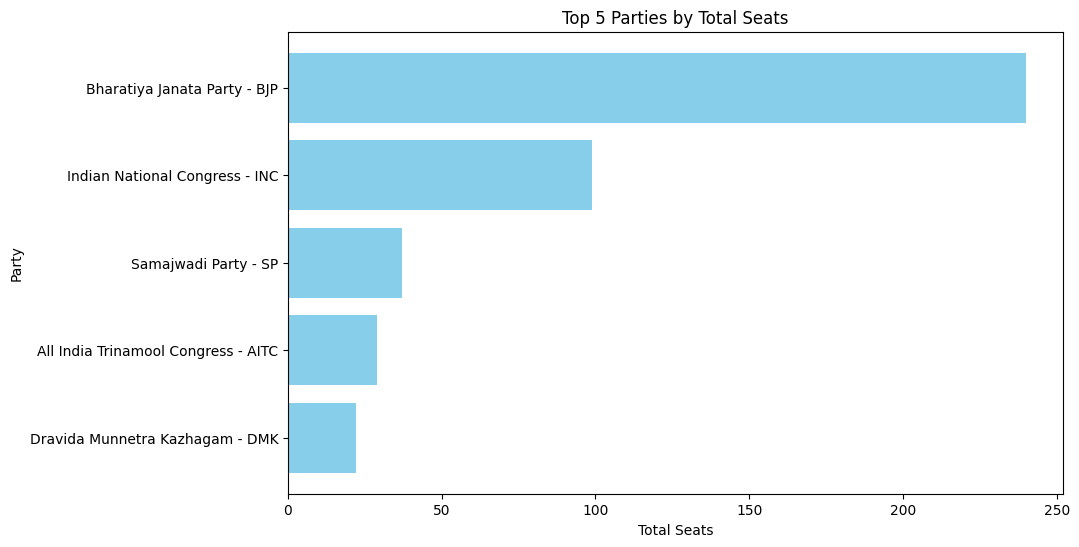

In [67]:
# Plotting the top 5 parties by total seats
top_5_parties = df.nlargest(5, 'Total')[['Party', 'Total']]

plt.figure(figsize=(10, 6))
plt.barh(top_5_parties['Party'], top_5_parties['Total'], color='skyblue')
plt.xlabel('Total Seats')
plt.ylabel('Party')
plt.title('Top 5 Parties by Total Seats')
plt.gca().invert_yaxis()
plt.show()


In [68]:
labels = ['BJP', 'Other Parties']
sizes = [top_party_seats, total_seats_won - top_party_seats]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (BJP)

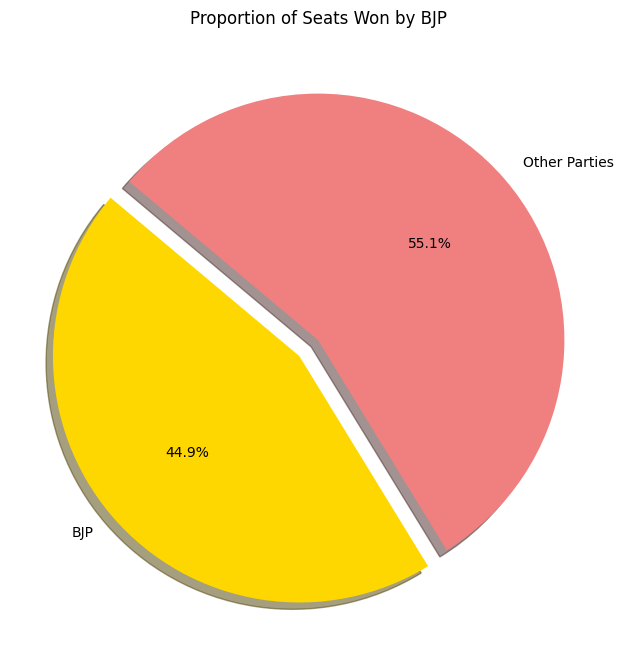

In [69]:
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Seats Won by BJP')
plt.show()


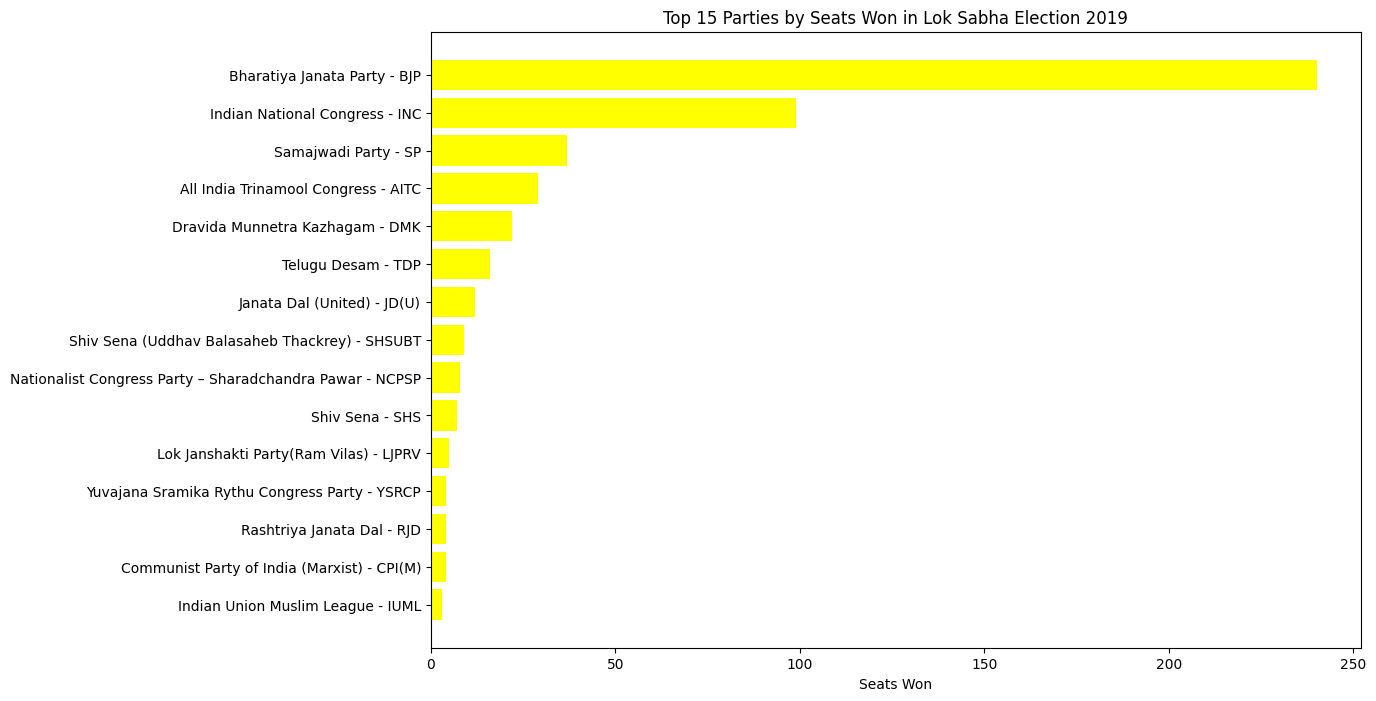

Top 15 Parties by Seats Won:
                                                Party  Won
0                        Bharatiya Janata Party - BJP  240
1                      Indian National Congress - INC   99
2                                Samajwadi Party - SP   37
3                 All India Trinamool Congress - AITC   29
4                     Dravida Munnetra Kazhagam - DMK   22
5                                  Telugu Desam - TDP   16
6                         Janata Dal (United) - JD(U)   12
7      Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT    9
8   Nationalist Congress Party – Sharadchandra Paw...    8
9                                     Shiv Sena - SHS    7
10             Lok Janshakti Party(Ram Vilas) - LJPRV    5
11      Yuvajana Sramika Rythu Congress Party - YSRCP    4
12                         Rashtriya Janata Dal - RJD    4
13        Communist Party of India (Marxist) - CPI(M)    4
14                  Indian Union Muslim League - IUML    3


In [63]:
#plot graphs from the the csv file
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file into a pandas DataFrame
file_path = '/content/Lok_sabha.csv'
df = pd.read_csv(file_path)

# Sorting the DataFrame by 'Won' in descending order
df_sorted = df.sort_values(by='Won', ascending=False)

# Plotting the top 10 parties by seats won
plt.figure(figsize=(12, 8))
plt.barh(df_sorted['Party'].head(15), df_sorted['Won'].head(15), color='yellow')
plt.xlabel('Seats Won')
plt.title('Top 15 Parties by Seats Won in Lok Sabha Election 2019')
plt.gca().invert_yaxis()  # Invert y-axis to show highest seats at the top
plt.show()

# Print the top 10 parties and their seats won
print("Top 15 Parties by Seats Won:")
print(df_sorted[['Party', 'Won']].head(15))

# Additional insights can be derived programmatically based on the data structure and requirements.


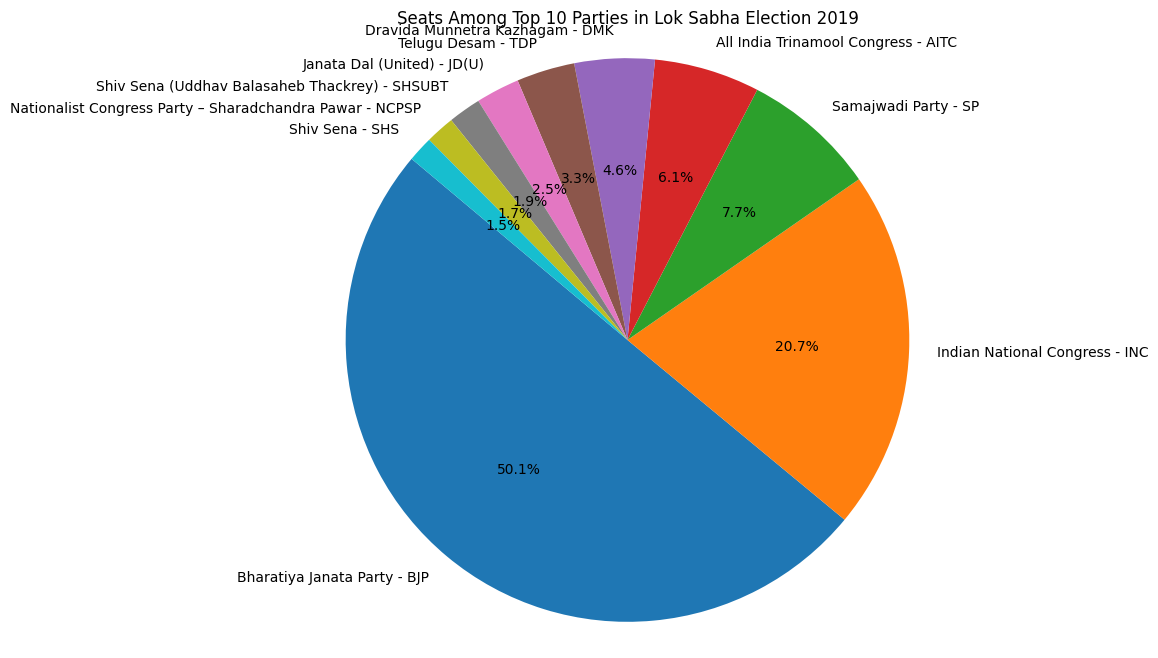

In [51]:

df_sorted = df.sort_values(by='Won', ascending=False)

# Selecting top 10 parties by seats won
top_10_parties = df_sorted.head(10)
plt.figure(figsize=(8, 8))  # Adjust figure size if necessary
plt.pie(top_10_parties['Won'], labels=top_10_parties['Party'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Seats Among Top 10 Parties in Lok Sabha Election 2019')
plt.show()


In [52]:

def party_details(party_name):
    party_info = df[df['Party'].str.contains(party_name, case=False)]
    if not party_info.empty:
        return party_info.iloc[0]
    return None

bjp_info = party_details('Bharatiya Janata Party')
if bjp_info is not None:
    print(f"Dominance of BJP: {bjp_info['Party']} has a significant lead with {bjp_info['Won']} seats out of {bjp_info['Total']}, indicating a strong electoral performance.")
else:
    print("BJP information not found.")





Dominance of BJP: Bharatiya Janata Party - BJP has a significant lead with 240 seats out of 240, indicating a strong electoral performance.


In [53]:
# Regional Party Influence
regional_parties = ['Samajwadi Party', 'All India Trinamool Congress', 'Dravida Munnetra Kazhagam']
regional_party_data = []
for party_name in regional_parties:
    party_info = party_details(party_name)
    if party_info is not None:
        print(f"Regional Party Influence: {party_info['Party']} holds {party_info['Won']} seats, indicating their regional electoral strength.")
        regional_party_data.append((party_info['Party'], party_info['Won']))


Regional Party Influence: Samajwadi Party - SP holds 37 seats, indicating their regional electoral strength.
Regional Party Influence: All India Trinamool Congress - AITC holds 29 seats, indicating their regional electoral strength.
Regional Party Influence: Dravida Munnetra Kazhagam - DMK holds 22 seats, indicating their regional electoral strength.


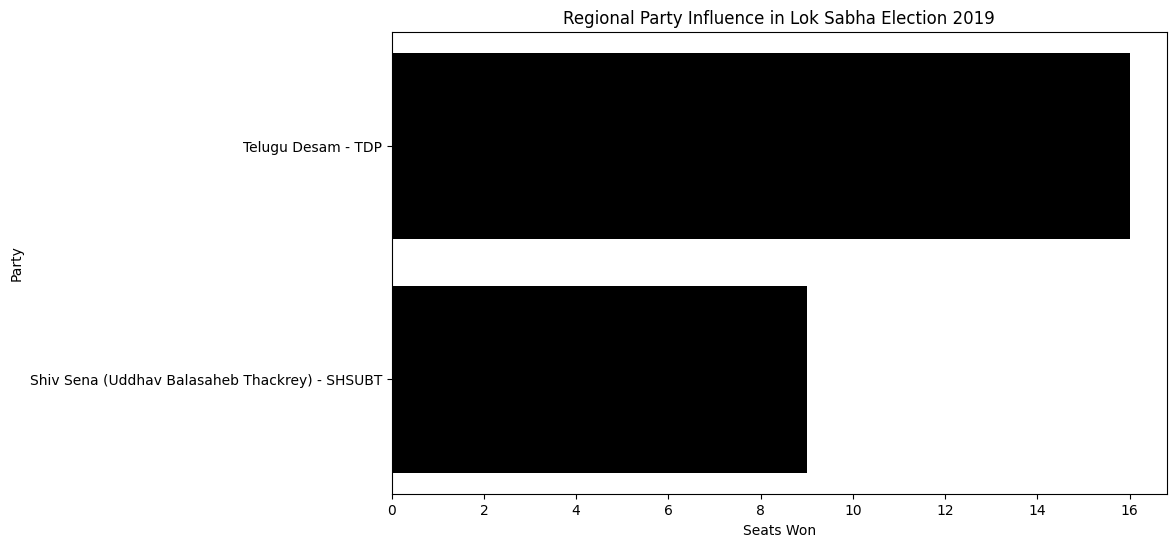

In [65]:
# Plotting Regional Party Influence
if regional_party_data:
    plt.figure(figsize=(10, 6))
    parties, seats = zip(*regional_party_data)
    plt.barh(parties, seats, color='black')
    plt.xlabel('Seats Won')
    plt.ylabel('Party')
    plt.title('Regional Party Influence in Lok Sabha Election 2019')
    plt.gca().invert_yaxis()
    plt.show()

In [55]:

congress_info = party_details('Indian National Congress')
if congress_info is not None:
    print(f"Congress as the Primary Opposition: {congress_info['Party']} is the closest competitor with {congress_info['Won']} seats, highlighting its position as the principal opposition party.")
else:
    print("Congress information not found.")

Congress as the Primary Opposition: Indian National Congress - INC is the closest competitor with 99 seats, highlighting its position as the principal opposition party.


In [56]:

total_parties = len(df) - 1
print(f"Variety of Political Representation: The data shows representation from {total_parties} parties, demonstrating the multi-party nature of Indian politics.")


Variety of Political Representation: The data shows representation from 39 parties, demonstrating the multi-party nature of Indian politics.


In [57]:

regional_parties = ['Telugu Desam', 'Shiv Sena']
regional_party_data = []
for party_name in regional_parties:
    party_info = party_details(party_name)
    if party_info is not None:
        print(f"Regional Concentrations: {party_info['Party']} has significant representation from specific states, reflecting regional political dynamics.")
        regional_party_data.append((party_info['Party'], party_info['Won']))


Regional Concentrations: Telugu Desam - TDP has significant representation from specific states, reflecting regional political dynamics.
Regional Concentrations: Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT has significant representation from specific states, reflecting regional political dynamics.


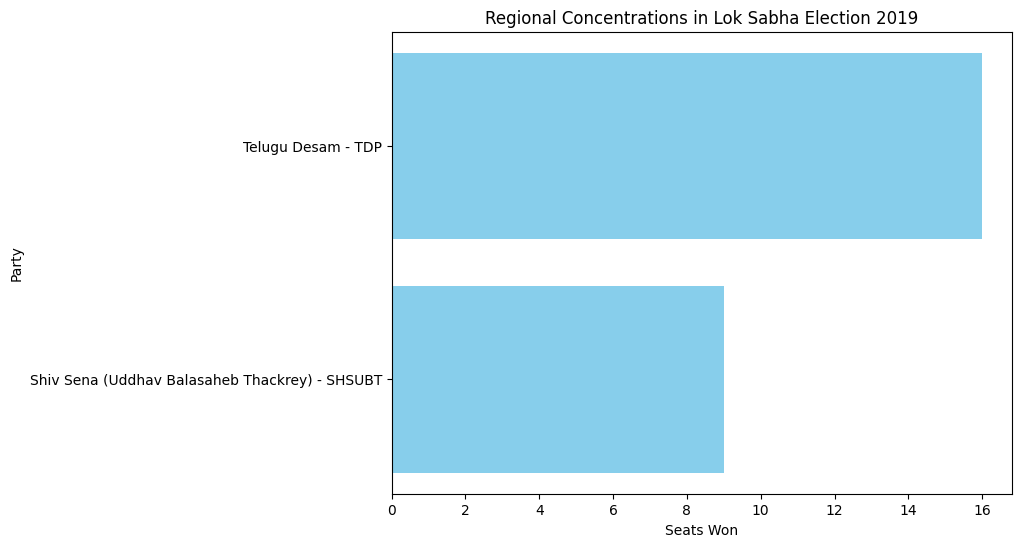

In [58]:

if regional_party_data:
    plt.figure(figsize=(8, 6))
    parties, seats = zip(*regional_party_data)
    plt.barh(parties, seats, color='skyblue')
    plt.xlabel('Seats Won')
    plt.ylabel('Party')
    plt.title('Regional Concentrations in Lok Sabha Election 2019')
    plt.gca().invert_yaxis()
    plt.show()

In [59]:
# Minority and Special Interest Parties
special_interest_parties = ['Indian Union Muslim League']
for party_name in special_interest_parties:
    party_info = party_details(party_name)
    if party_info is not None:
        print(f"Minority and Special Interest Parties: {party_info['Party']} is represented in the Lok Sabha.")

Minority and Special Interest Parties: Indian Union Muslim League - IUML is represented in the Lok Sabha.


In [60]:
# Emergence of New Parties
new_parties = ['Aam Aadmi Party', 'Yuvajana Sramika Rythu Congress Party']
new_party_data = []
for party_name in new_parties:
    party_info = party_details(party_name)
    if party_info is not None:
        print(f"Emergence of New Parties: {party_info['Party']} has gained traction, indicating shifts in political preferences.")
        new_party_data.append((party_info['Party'], party_info['Won']))

Emergence of New Parties: Aam Aadmi Party - AAAP has gained traction, indicating shifts in political preferences.
Emergence of New Parties: Yuvajana Sramika Rythu Congress Party - YSRCP has gained traction, indicating shifts in political preferences.


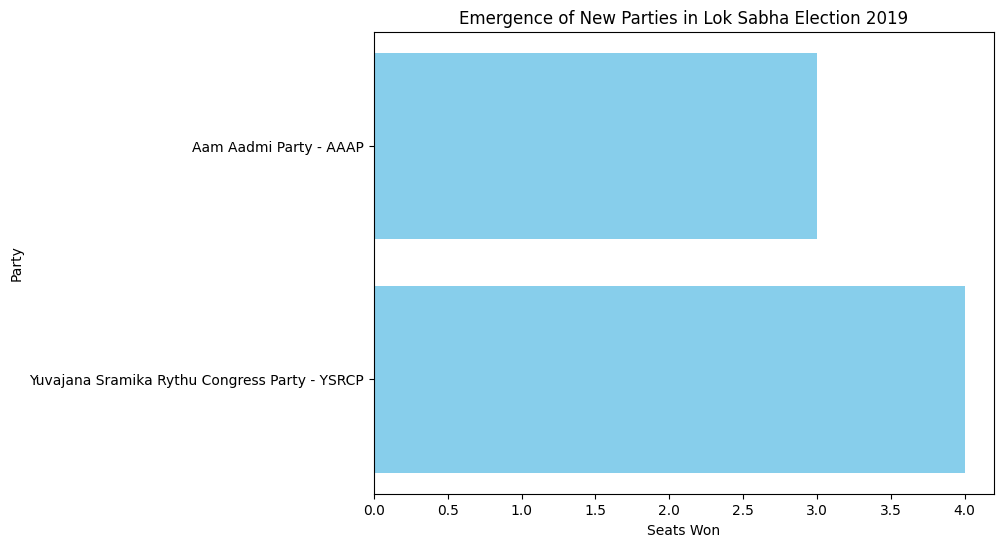

In [64]:
# Plotting Emergence of New Parties
if new_party_data:
    plt.figure(figsize=(8, 6))
    parties, seats = zip(*new_party_data)
    plt.barh(parties, seats, color='skyblue')
    plt.xlabel('Seats Won')
    plt.ylabel('Party')
    plt.title('Emergence of New Parties in Lok Sabha Election 2019')
    plt.gca().invert_yaxis()
    plt.show()
